### Control Digital en Sistemas Embebidos - MSE - PRACTICA 1

In [2]:
import numpy as np
from scipy.linalg import expm
from control import *
import matplotlib.pyplot as plt

In [3]:
r_1 = 10e3
c_1 = 10e-6
r_2 = 1e3 #valor particular de la planta
c_2 = 10e-6

**1)** Crear una planta mediante los coeficientes del denominador y numerador en el dominio continuo.

**Opcion 1:** Realizar el desarrollo matematico de la ecuación diferencial del circuito y obtener la función transferencia en el dominio de Laplace

In [4]:
s = tf('s')
hs_1 = 1 / ((r_1*c_1*r_2*c_2)*s*s + (r_1*c_1+r_1*c_2+r_2*c_2)*s + 1)
num_1, den_1 = tfdata(hs_1)
num_1, den_1


([[array([1])]], [[array([0.001, 0.21 , 1.   ])]])

**Opcion 2:** Realizar el desarrollo matematico de la ecuación diferencial del circuito para obtener los coeficientes del numerador y denominador

In [5]:
num_2 = np.array([1])
den_2 = np.array([(r_1*c_1*r_2*c_2), (r_1*c_1+r_1*c_2+r_2*c_2), 1])
hs_2 = tf(num_2, den_2)
hs_2

TransferFunction(array([1]), array([0.001, 0.21 , 1.   ]))

**2)** Crear una planta mediante las matrices de estado (A, B, C y D) que la definen.

Se pueden obtener los coeficientes de las ecuaciones de estado a partir de los coeficientes del numerador y denominador, y la funcion 'tf2ss'.

In [6]:
ss_1 = tf2ss(num_1, den_1)
ss_1

StateSpace(array([[ -210., -1000.],
       [    1.,     0.]]), array([[1.],
       [0.]]), array([[   0., 1000.]]), array([[0.]]))

Se pueden obtener los coeficientes del numerador y denominador de la funcion transferencia a partir de los coeficientes de estado con 'ss2tf'

In [7]:
hs_2 = ss2tf(ss_1)
hs_2

TransferFunction(array([2.84217094e-14, 1.00000000e+03]), array([1.0e+00, 2.1e+02, 1.0e+03]))

In [8]:
hs_3 = ss2tf(ss_1.A, ss_1.B, ss_1.C, ss_1.D)
hs_3

TransferFunction(array([2.84217094e-14, 1.00000000e+03]), array([1.0e+00, 2.1e+02, 1.0e+03]))

También puede obtenerse la función transferencia a partir de los coeficientes de las ecuaciones de estado con: 

$H_{s} = C (sI − A)^{−1} B + D$

In [9]:
s = tf('s')
hs_3 = ss_1.C / (np.multiply(np.eye(ss_1.A.shape[0]), s) - ss_1.A) * ss_1.B + ss_1.D
hs_3

array([[TransferFunction(array([0.]), array([1.])),
        TransferFunction(array([1000.]), array([1000.]))],
       [TransferFunction(array([0.]), array([1.])),
        TransferFunction(array([0.]), array([1.]))]], dtype=object)

**3)** Discretizar las anteriores plantas

In [10]:
h = 0.1

**Opcion 1:** Discretizar utilizando la funcion 'c2d'

In [11]:
hz_1 = c2d(hs_1, h, 'zoh')
numz_1, denz_1 = tfdata(hz_1)
print(numz_1[0][0])

ss_2 = tf2ss(numz_1, denz_1)
ss_2

[0.37089332 0.01495159]


StateSpace(array([[ 6.14155085e-01, -7.58256104e-10],
       [ 1.00000000e+00,  0.00000000e+00]]), array([[1.],
       [0.]]), array([[0.37089332, 0.01495159]]), array([[0.]]))

**Opcion 2:** Discretizar utilizando las funciones para obtener las ecuaciones de estado discretas a partir de los coeficientes de las ecuaciones en tiempo continuo.

In [12]:
phi_2 = expm(ss_1.A * h)
rho_2 = (expm(ss_1.A * h) - expm(ss_1.A * 0)) / ss_1.A * ss_1.B
cz_2 = ss_1.C
dz_2 = 0

# ss2tf(phi_2, rho_2, cz_2, dz_2)
# rho_2

/tmp/ipykernel_22288/3481194631.py:2: RuntimeWarning: divide by zero encountered in divide
  rho_2 = (expm(ss_1.A * h) - expm(ss_1.A * 0)) / ss_1.A * ss_1.B
/tmp/ipykernel_22288/3481194631.py:2: RuntimeWarning: invalid value encountered in multiply
  rho_2 = (expm(ss_1.A * h) - expm(ss_1.A * 0)) / ss_1.A * ss_1.B


**4)** Evaluar la distribución de polos y ceros de las plantas continuas y discretas, también su respuesta en frecuencia.

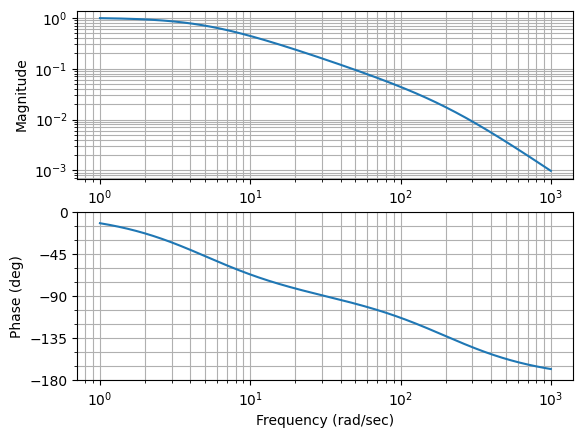

In [13]:
bode_plot(hs_1);

In [14]:
zeros(hs_1), poles(hs_1)

(array([], dtype=complex128), array([-205.12492197+0.j,   -4.87507803+0.j]))

In [15]:
zeros(hz_1), poles(hz_1)

(array([-0.04031238+0.j]), array([6.14155084e-01+0.j, 1.23463295e-09+0.j]))

(array([6.14155084e-01+0.j, 1.23463295e-09+0.j]), array([-0.04031238+0.j]))

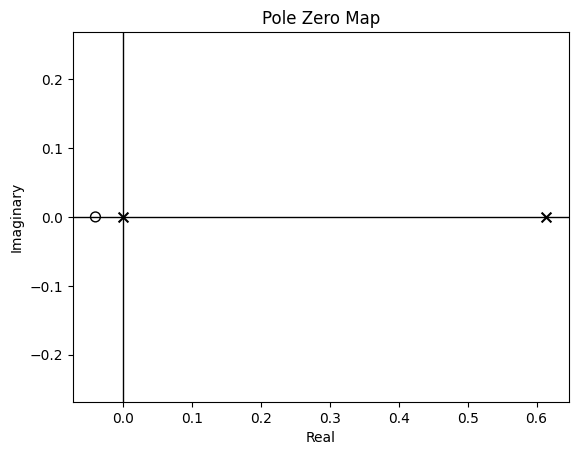

In [16]:
pzmap(hz_1)

**5)** Evaluar la respuesta al escalón de todas las plantas (continuas y discretas)

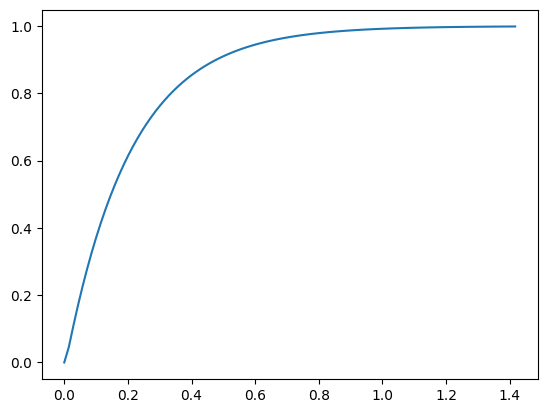

In [17]:
t, hs_out = step_response(hs_1)
plt.plot(t, hs_out);

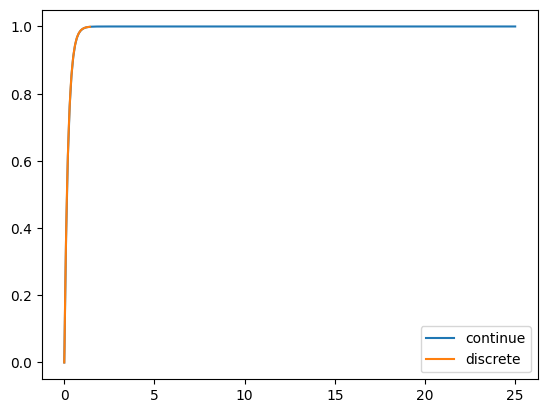

In [18]:
t1, hz_out = step_response(hz_1)
t2, hs_out = step_response(hs_1)
plt.plot(t1, hz_out, label = "continue")
plt.plot(t2, hs_out, label = "discrete")
plt.legend()

**6)** Crear una función que aplique la ecuación de recurrencia de un filtro a una entrada cualquiera. (Ver función filter de Matlab).

In [19]:
def funcion_recurrencia(num: np.ndarray, den: np.ndarray, input: np.ndarray) -> np.ndarray:
    # Convertir a arrays de tipo float para evitar problemas de división
    num = np.array(num, dtype=float)
    den = np.array(den, dtype=float)

    # Validación de la longitud de los coeficientes
    if len(den) < 1 or len(num) < 1:
        raise ValueError("Los coeficientes del numerador y del denominador deben tener al menos un elemento.")
    
    # Normalización del denominador
    if den[0] != 1:
        num = num / den[0]
        den = den / den[0]

    # Longitud de la entrada y los coeficientes
    N = len(input)
    M = len(num)
    K = len(den)

    # Salida inicializada a ceros
    output = np.zeros(N)

    # Aplicar la ecuación en diferencias
    for n in range(N):
        # Parte del numerador
        for m in range(M):
            if n - m >= 0:
                output[n] += num[m] * input[n - m]
        
        # Parte del denominador
        for k in range(1, K):
            if n - k >= 0:
                output[n] -= den[k] * output[n - k]
    
    return output


**7)** Compare las respuestas al escalón discretas con el comando step frente a la creada con la ecuación de recurrencia

In [20]:
t = np.linspace(h, h * 100, 100)
u = np.concatenate((np.zeros(int(len(t) / 2)), np.ones(int(len(t) / 2))), axis=None)

In [21]:
y_1 = funcion_recurrencia(numz_1[0][0], denz_1[0][0], u)
t_2, y_2 = input_output_response(tf2io(hz_1), t, u)

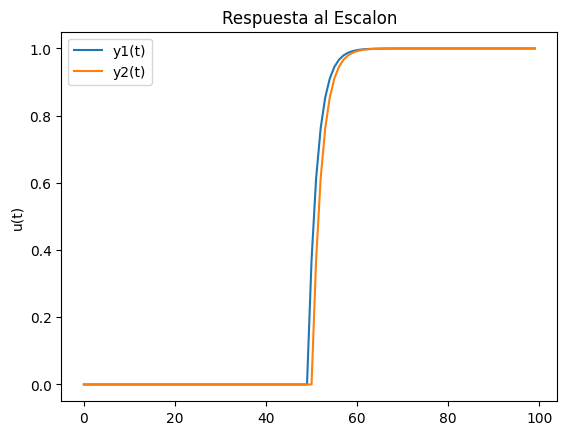

In [22]:
p_1 = plt.plot(y_1)
p_2 = plt.plot(y_2)
plt.ylabel('u(t)')
plt.title('Respuesta al Escalon')
plt.legend((p_1[0], p_2[0]), ('y1(t)', 'y2(t)'));